### Feeder Data for CA Grid Model

Includes Owner detail, number of ciricuits, geo-location, length, type, activity status, county, etc.

Downloaded from 
[California Electric Transmission Lines](https://gis.data.ca.gov/datasets/260b4513acdb4a3a8e4d64e69fc84fee/explore) &
[California Power Plants](https://cecgis-caenergy.opendata.arcgis.com/datasets/4a702cd67be24ae7ab8173423a768e1b_0/explore?location=36.343734%2C-102.595343%2C4.83)

In [1]:
# loading libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd 
import xarray as xr 
import rioxarray as rioxr
import rasterio 
import matplotlib.pyplot as plt
import ipyleaflet
import folium
import shapely


from ipyleaflet import GeoJSON, Map, Marker, Popup, basemap_to_tiles, basemaps, LayersControl, Marker, Popup, GeoData
from ipywidgets import HTML 

from shapely.validation import make_valid
from shapely.geometry import Polygon


# Function to convert column names to snake_case
def to_snake_case(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('\n', '_').str.lower()
    return df

In [2]:
path_to_file = '../../../data/Thrust_2.1_Building_Energy_DS/grid_feeder_data/Transmission_Line_8157279845119687626.csv'

feeder_data = pd.read_csv(path_to_file)

feeder_data.head(3)

,OBJECTID,Name,kV,kV (Sort),Owner,Status,Circuit,Type,Legend,Length (Mile),Length (Feet),TLine Name,Source,Comments,Creator,Creator Date,Last Editor,Last Editor Date,GlobalID,Shape__Length
0,1,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,2.0,10879.980775,,AMP,,FTHONG,8/31/2012 12:00:00 AM,SVC_AGIS_SQLADM,4/25/2016 3:28:11 PM,e250d3dd-0564-42f8-822f-73f741c17218,4198.109678
1,2,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,3.0,16505.411239,,AMP,,FTHONG,8/31/2012 12:00:00 AM,SVC_AGIS_SQLADM,4/25/2016 3:28:11 PM,16eb0e69-4e5b-4af0-acce-37915f94d9b3,6368.076880
2,3,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,1.0,3807.240142,,AMP,,FTHONG,8/31/2012 12:00:00 AM,SVC_AGIS_SQLADM,4/25/2016 3:28:11 PM,c1c874a0-f619-4537-8537-3f4cdb4e0982,1470.170052


<Axes: >

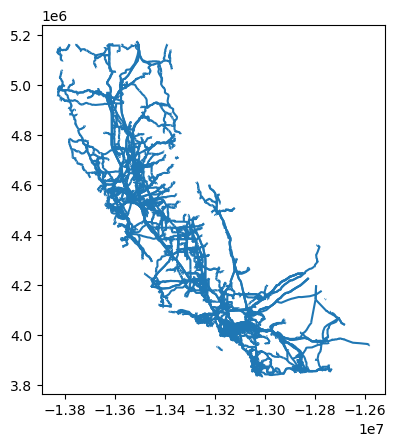

In [3]:
path_to_shape = '../../../data/Thrust_2.1_Building_Energy_DS/grid_feeder_data/Transmission_Line_7304850911266214096/TransmissionLine_CEC.shp'

feeder_shape = gpd.read_file(path_to_shape)

feeder_shape.plot()

In [4]:
feeder_shape.head()

,Name,kV,kV_Sort,Owner,Status,Circuit,Type,Legend,Length_Mil,Length_Fee,TLine_Name,Source,Comments,Creator,Creator_Da,Last_Edito,Last_Edi_1,GlobalID,geometry
0,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,2.0,10879.98077483,None,AMP,None,FTHONG,2012-08-31,SVC_AGIS_SQLADM,2016-04-25,e250d3dd-0564-42f8-822f-73f741c17218,"LINESTRING (-13608018.951 4547326.915, -136080..."
1,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,3.0,16505.41123852,None,AMP,None,FTHONG,2012-08-31,SVC_AGIS_SQLADM,2016-04-25,16eb0e69-4e5b-4af0-acce-37915f94d9b3,"LINESTRING (-13608044.414 4547272.768, -136080..."
2,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,1.0,3807.24014248,None,AMP,None,FTHONG,2012-08-31,SVC_AGIS_SQLADM,2016-04-25,c1c874a0-f619-4537-8537-3f4cdb4e0982,"LINESTRING (-13613422.397 4548276.164, -136134..."
3,AMP 115kV,115,115.0,AMP,Operational,Single,OH,Other_110_161kV,1.0,6135.61557739,None,AMP,Partially underwater,FTHONG,2012-08-31,SVC_AGIS_SQLADM,2016-04-25,7809d1a4-1fb9-4841-bf9a-192acb047266,"LINESTRING (-13613131.635 4549619.954, -136131..."
4,ANZA 34kV,34,34.0,ANZA,Operational,Single,OH,Other_33_92kV,24.0,127189.40561552,None,City of Anza,None,FTHONG,2012-08-24,SVC_AGIS_SQLADM,2016-04-25,e26bc920-7d3b-404d-9b5e-0d65db992b62,"LINESTRING (-12994452.454 3989231.906, -129944..."


<Axes: >

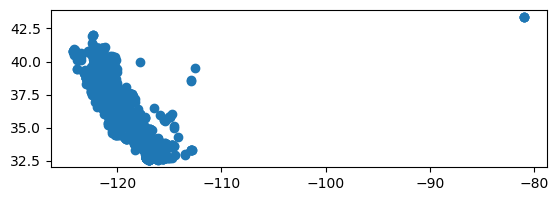

In [5]:
path_to_plants = '../../../data/Thrust_2.1_Building_Energy_DS/grid_feeder_data/Power_Plant_5168098545334623415/California_Power_Plants.shp'

plant_shape = gpd.read_file(path_to_plants)

plant_shape.plot()

In [8]:
plant_shape.head()

,CECPlantID,PlantName,Retired_Pl,OperatorCo,County,Capacity_L,Units,PriEnergyS,StartDate,CEC_Jurisd,geometry
0,S0335,Corcoran 2 Solar LLC CED,0.0,RWE Clean Energy,Kings,19.8,1,SUN,2015-06-10,0,POINT (-119.56789 36.13717)
1,S0520,Corcoran 3 Solar,0.0,RWE Clean Energy,Kings,20.0,Unit 1,SUN,2016-02-11,0,POINT (-119.57971 36.14432)
2,C0007,Hanford - Retired October 2011,1.0,Hanford LP,Kings,24.0,GEN 1,PC,1990-09-01,0,POINT (-119.64839 36.26964)
3,G0832,Hanford Energy Park Peaker,0.0,"MRP San Joaquin Energy, LLC",Kings,92.0,"1, 2",NG,2001-09-01,1,POINT (-119.64744 36.27031)
4,S0608,Exeter Solar,0.0,Altus Power,Tulare,3.5,ES,SUN,2014-02-12,0,POINT (-119.12833 36.26630)


In [6]:
plant_shape = plant_shape.to_crs(epsg=4326)

feeder_shape = feeder_shape.to_crs(epsg=4326)

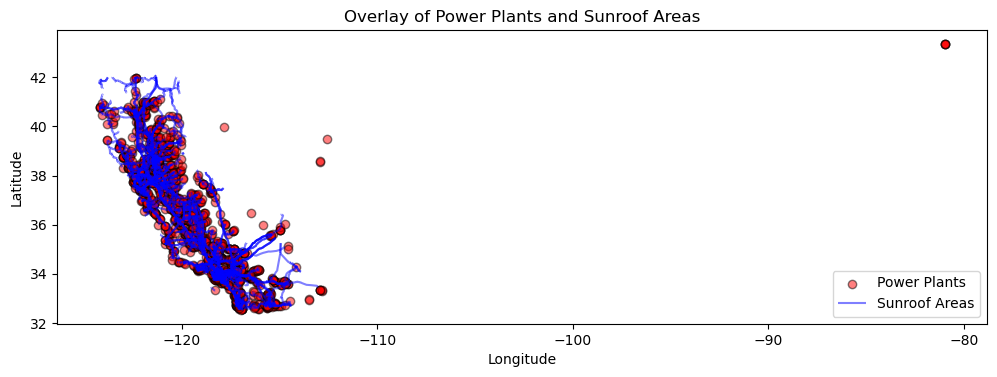

In [7]:
# Plotting both datasets
fig, ax = plt.subplots(figsize=(12, 8))

# Plot power plants
plant_shape.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Power Plants')

# Plot sunroof data
feeder_shape.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Sunroof Areas')

# Add titles and labels
plt.title('Overlay of Power Plants and Sunroof Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
